In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from collections import defaultdict
from datetime import datetime
import h5py
import matplotlib.pyplot as plt
from neural_analysis.matIO import loadmat
import numpy as np
import os
import pandas as pd
import re
from scipy.signal import butter, filtfilt, freqz
import shutil
import sys
import time
from tqdm.auto import tqdm

sys.path.append('../../..')
from ld_utils import compute_eigs, get_data_sigma_norms
from plot import plot_individual_areas, plot_multipopulation
from up_down import get_up_down
from utils import get_data_class, get_optimal_VAR_results, load, save

In [3]:
## propofolPuffTone
session = 'Mary-Anesthesia-20160809-01'
# session = 'MrJones-Anesthesia-20160105-01'
# session = 'Mary-Anesthesia-20160916-02'
# session = 'MrJones-Anesthesia-20160301-01'
# session = 'MrJones-Anesthesia-20160113-01'
# session = 'Mary-Anesthesia-20160818-02'
# session = 'MrJones-Anesthesia-20160121-01'

## propofolWakeup
# session = 'Mary-Anesthesia-20170203-02'

## ketamine
# session = 'Mary-Anesthesia-20170315-01'
# session = 'MrJones-Anesthesia-20160805-01'
# session = 'MrJones-Anesthesia-20160808-01'
# session = 'Mary-Anesthesia-20170315-01'

## Load Neural Data

In [4]:
all_data_dir = f"/om/user/eisenaj/datasets/anesthesia/mat"
data_class = get_data_class(session, all_data_dir)

In [5]:
filename = os.path.join(all_data_dir, data_class, f'{session}.mat')
print("Loading data ...")
start = time.process_time()
electrode_info, lfp_schema, session_info, spike_times, trial_info, unit_info = loadmat(filename, variables=['electrodeInfo', 'lfpSchema', 'sessionInfo', 'spikeTimes', 'trialInfo', 'unitInfo'], verbose=False)
spike_times = spike_times[0]
dt = lfp_schema['smpInterval'][0]
# T = lfp.shape[0]

print(f"Data loaded (took {time.process_time() - start:.2f} seconds)")

Loading data ...
Data loaded (took 8.29 seconds)


## Load VAR Results

In [6]:
VAR_results = get_optimal_VAR_results(session, data_class, session_info)

Loading file /om/user/eisenaj/ChaoticConsciousness/results/propofolPuffTone/VAR/Mary-Anesthesia-20160809-01_selected_windows_phases_10_steps
Now attempting to load area 7b with window 5
Now attempting to load area 7b with window 8.5
Now attempting to load area CPB with window 8.5
Now attempting to load area FEF with window 4
Now attempting to load area CPB with window 6.5
Now attempting to load area all with window 6.5
Now attempting to load area vlPFC with window 6.5
Now attempting to load area 7b with window 7
Now attempting to load area vlPFC with window 7
Now attempting to load area CPB with window 10
Now attempting to load area FEF with window 8
Now attempting to load area all with window 8
Now attempting to load area FEF with window 5.5
Now attempting to load area all with window 9.5


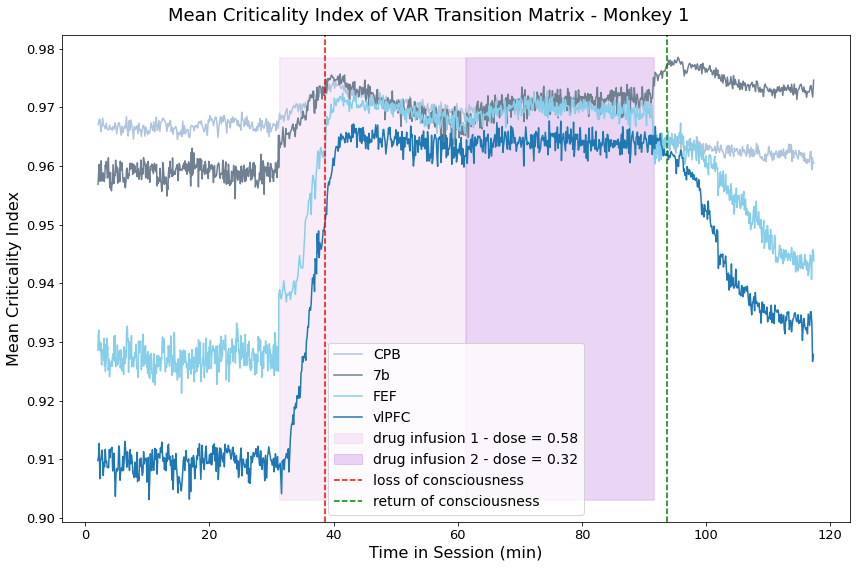

In [7]:
plot_individual_areas(session, data_class, VAR_results, session_info, start_time=125, end_time=None)

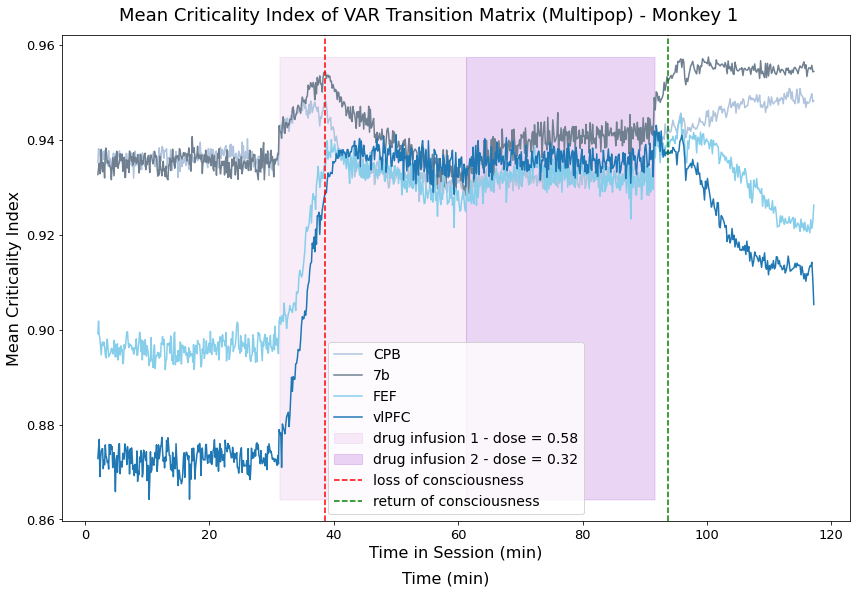

In [8]:
plot_multipopulation(session, data_class, VAR_results, session_info, electrode_info, start_time=125, end_time=None)